Name: Tanish Vaidya

Batch: EB2

Roll: C115

Subject: NNDL

Aim: Stock Market Prediction using LSTM



In [103]:
pip install numpy matplotlib pandas tensorflow

# **Step 1: Load the dataset in the notebook.**


In [104]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load the dataset
df = pd.read_csv('/content/NFLX.csv')

In [105]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [106]:
df.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400



# **Step 2: Select the appropriate feature for creating the model from the training data.**

In [109]:
data = df['Close'].values.reshape(-1, 1)

# **Step 3: Normalize the features and convert it into time stamps of 60.**


In [110]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)


# **Step 4: Reshape the data (3 D array) for applying to the LSTM model.**


In [122]:
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [123]:
seq_length = 60

In [124]:
X, y = create_sequences(scaled_data, seq_length)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# **Step 5: Create a sequential LSTM model using Keras.**


In [114]:
from keras.callbacks import EarlyStopping
from keras.layers import Dropout

# Step 5: Create a sequential LSTM model using Keras with dropout
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))  # Add dropout for regularization
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))  # Add dropout for regularization
model.add(Dense(units=1))

# **Step 6: Compile the model and train it using the training data.**


In [115]:
model.compile(optimizer='adam', loss='mean_squared_error')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X, y, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
24/24 [==============================] - 8s 128ms/step - loss: 0.0513 - val_loss: 0.0366
Epoch 2/100
24/24 [==============================] - 4s 152ms/step - loss: 0.0061 - val_loss: 0.0088
Epoch 3/100
24/24 [==============================] - 3s 125ms/step - loss: 0.0038 - val_loss: 0.0067
Epoch 4/100
24/24 [==============================] - 3s 128ms/step - loss: 0.0039 - val_loss: 0.0067
Epoch 5/100
24/24 [==============================] - 3s 142ms/step - loss: 0.0037 - val_loss: 0.0062
Epoch 6/100
24/24 [==============================] - 4s 167ms/step - loss: 0.0034 - val_loss: 0.0081
Epoch 7/100
24/24 [==============================] - 3s 141ms/step - loss: 0.0035 - val_loss: 0.0054
Epoch 8/100
24/24 [==============================] - 3s 115ms/step - loss: 0.0034 - val_loss: 0.0051
Epoch 9/100
24/24 [==============================] - 3s 143ms/step - loss: 0.0032 - val_loss: 0.0050
Epoch 10/100
24/24 [==============================] - 3s 125ms/step - loss: 0.0031 - val_lo

# **Step 7: Predict using the test data.**

In [107]:
print("Minimum Date:", df['Date'].min())
print("Maximum Date:", df['Date'].max())

Minimum Date: 2018-02-05
Maximum Date: 2022-02-04


In [130]:
df['Date'] = pd.to_datetime(df['Date'])

In [131]:
split_date = '2020-02-04'
train_data = df[df['Date'] < split_date]
test_data = df[df['Date'] >= split_date]

In [133]:
# Preprocess the training and testing data similarly to the training data above
train_data = train_data['Close'].values.reshape(-1, 1)
test_data = test_data['Close'].values.reshape(-1, 1)

In [134]:
scaled_train_data = scaler.fit_transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [135]:
# Prepare sequences for training and testing data
X_train, y_train = create_sequences(scaled_train_data, seq_length)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [136]:
X_test, y_test = create_sequences(scaled_test_data, seq_length)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [137]:
predictions = model.predict(X)

30/30 [==============================] - 1s 18ms/step


In [139]:
print(predictions)

[[0.16663307]
 [0.16750339]
 [0.16840431]
 [0.17244348]
 [0.1798176 ]
 [0.18785468]
 [0.1961031 ]
 [0.20263827]
 [0.20581096]
 [0.2074551 ]
 [0.20702888]
 [0.20642   ]
 [0.20465097]
 [0.202221  ]
 [0.20291321]
 [0.20501563]
 [0.21268421]
 [0.22363542]
 [0.23503815]
 [0.2438633 ]
 [0.25122327]
 [0.25559294]
 [0.26100087]
 [0.26661485]
 [0.27288985]
 [0.2789505 ]
 [0.28121966]
 [0.2808547 ]
 [0.27962977]
 [0.27922946]
 [0.28604394]
 [0.30061242]
 [0.3158481 ]
 [0.32773584]
 [0.34184843]
 [0.3592142 ]
 [0.37393308]
 [0.38235718]
 [0.37434143]
 [0.3667795 ]
 [0.3569631 ]
 [0.35041714]
 [0.34518176]
 [0.34474313]
 [0.34357494]
 [0.3458773 ]
 [0.35373133]
 [0.36744088]
 [0.37972647]
 [0.39014417]
 [0.39512032]
 [0.38865513]
 [0.38022387]
 [0.36347568]
 [0.34457785]
 [0.32398158]
 [0.30552143]
 [0.29251105]
 [0.28265613]
 [0.27868396]
 [0.27856255]
 [0.27720827]
 [0.26730952]
 [0.2560979 ]
 [0.24662302]
 [0.2421839 ]
 [0.24049145]
 [0.24360035]
 [0.2488292 ]
 [0.25233346]
 [0.25490278]
 [0.25

In [156]:
from sklearn.metrics import mean_squared_error
import math

In [157]:
# Inverse transform the original data
original_data = scaler.inverse_transform(y.reshape(-1, 1))

In [158]:
# Calculate RMSE
mse = mean_squared_error(original_data, predictions)
print("Root Mean Squared Error (MSE):", mse)
rmse = math.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (MSE): 40.75689271991942
Root Mean Squared Error (RMSE): 6.384112524064673


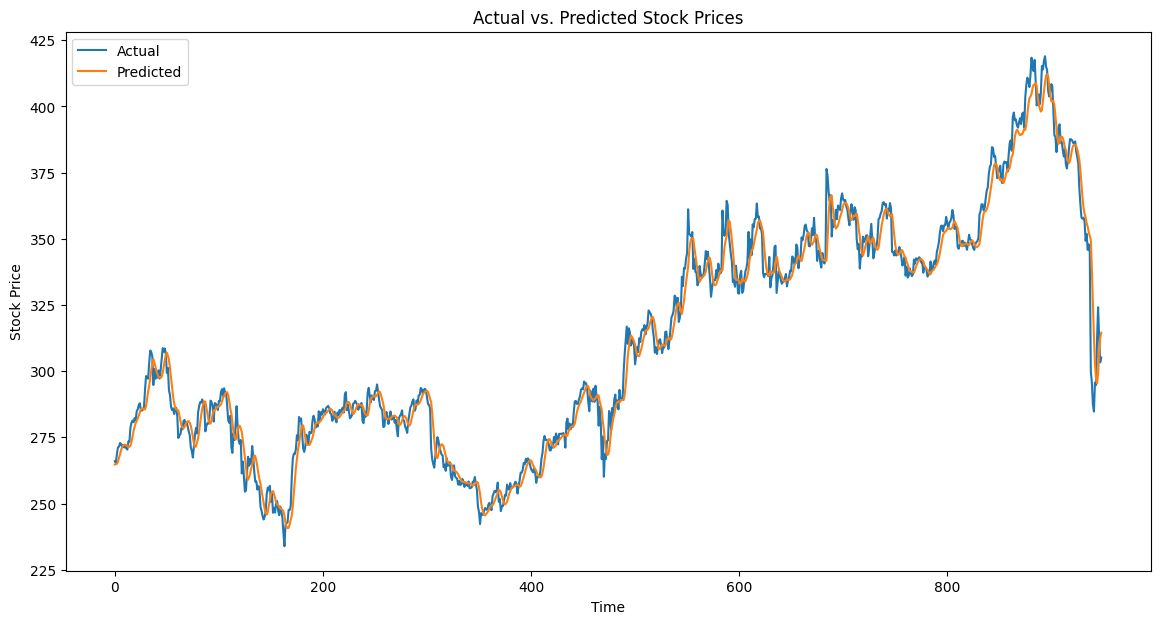

In [159]:
import matplotlib.pyplot as plt

# Plotting the model architecture
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Plotting the actual vs. predicted values
plt.figure(figsize=(14, 7))
plt.plot(original_data, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('Actual vs. Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()